<a href="https://colab.research.google.com/github/vijin670/Codsoft/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
path="/content/advertising.csv"
df=pd.read_csv(path)
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.info

<bound method DataFrame.info of         TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]>

In [4]:
print("Rows", df.shape[0])
print("Columns", df.shape[1])

Rows 200
Columns 4


In [5]:

df.dtypes

,0
TV,float64
Radio,float64
Newspaper,float64
Sales,float64


In [6]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [7]:
df = df.dropna()
print(df)

        TV  Radio  Newspaper  Sales
0    230.1   37.8       69.2   22.1
1     44.5   39.3       45.1   10.4
2     17.2   45.9       69.3   12.0
3    151.5   41.3       58.5   16.5
4    180.8   10.8       58.4   17.9
..     ...    ...        ...    ...
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4

[200 rows x 4 columns]


In [8]:
df.isna().sum()

,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [9]:
print("Maximun Sales=",df["Sales"].max())
print("Minimun Sales=",df["Sales"].min())

Maximun Sales= 27.0
Minimun Sales= 1.6


In [10]:
print("Standard Deviation", df["Sales"].std())


Standard Deviation 5.283892252561874


In [11]:
print("For TV")
df.agg(
    {
    "Sales":["min", "max","mean"],
    "TV":["min", "max","mean"]
    }
)

For TV


,Sales,TV
min,1.6000,0.7000
max,27.0000,296.4000
mean,15.1305,147.0425


In [12]:
df.agg(
    {
    "Sales":["min", "max","mean"],
    "Radio":["min", "max","mean"]
    }
)

,Sales,Radio
min,1.6000,0.000
max,27.0000,49.600
mean,15.1305,23.264


In [13]:
print("For Newspaper")
df.agg(
    {
    "Sales":["min", "max","mean"],
    "Newspaper":["min", "max","mean"]
    }
)

For Newspaper


,Sales,Newspaper
min,1.6000,0.300
max,27.0000,114.000
mean,15.1305,30.554


In [14]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [15]:
df.kurt()

,0
TV,-1.226495
Radio,-1.260401
Newspaper,0.649502
Sales,-0.640075


In [16]:
df.skew()

,0
TV,-0.069853
Radio,0.094175
Newspaper,0.894720
Sales,-0.073739


In [17]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [18]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

Text(0.5, 1.0, 'quantity and its count')

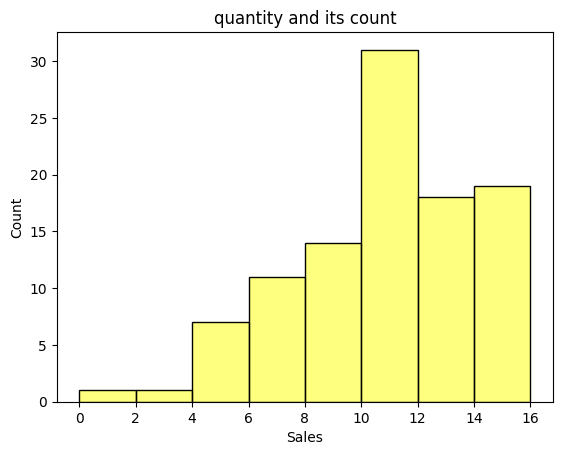

In [19]:
bin=[0,2,4,6,8,10,12,14,16]
sns.histplot(x='Sales', bins=bin, data=df, color="yellow", alpha=0.5)
plt.title("quantity and its count")

<Axes: >

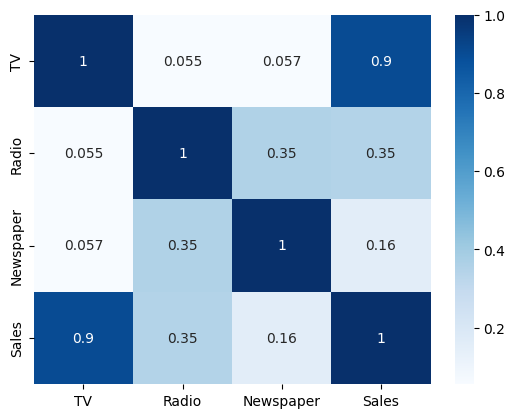

In [20]:
sns.heatmap(df.corr(), annot=True, cmap="Blues")

In [21]:
x = df.iloc[:, :-1].values
x

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [22]:
y = df.iloc[:, 3].values
y

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [24]:
x_train.size

420

In [25]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_predict = lr.predict(x_test)

In [26]:
y_pred= lr.predict([[45.6,55.2,42.1]])

In [27]:
print("Predicted Sales:",y_pred)

Predicted Sales: [12.6776786]


In [28]:
r2_score = lr.score(x_train, y_train)
print("Training Score:", r2_score*100, "%")

Training Score: 89.36484319605036 %


In [29]:
r2_score = lr.score(x_test, y_test)
print("Testing Score:", r2_score*100, "%")

Testing Score: 91.19365079893468 %


In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


y_true = df['Sales']


y_pred = lr.predict(x)


mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 1.2573988930269469
Mean Squared Error (MSE): 2.763994146615255
Root Mean Squared Error (RMSE): 1.6625264348620912
R-squared (R2): 0.9005038829669314
